In [354]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [355]:
plt.rcParams["figure.figsize"] = (20,10)

In [356]:
# this is data produced by creating 250m buffer around train and subway stations
# and then  intesecting it with datazones 

gdf = gpd.read_file(r'd:\viz\trainlines\derived\New folder\derived_data.gpkg', layer='dz_buf')

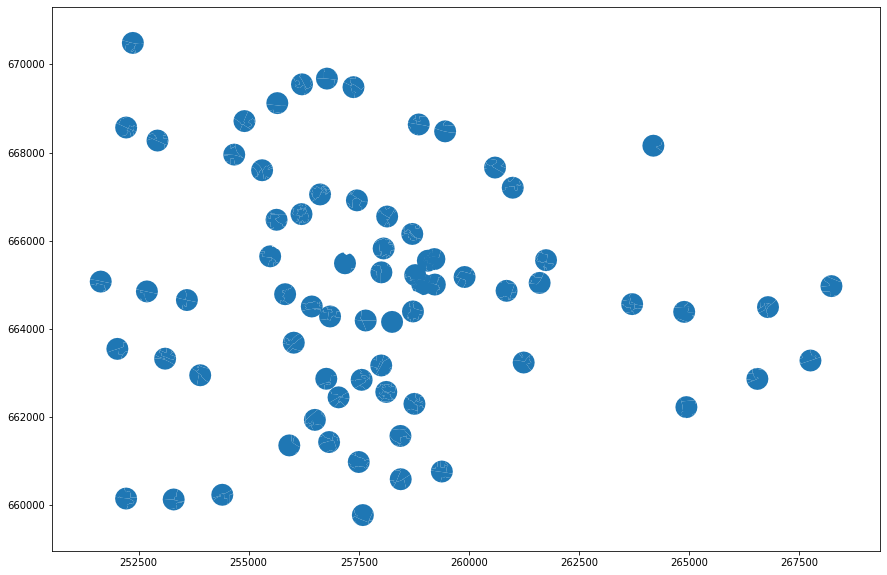

In [357]:
gdf.plot()

In [358]:
gdf.columns

Index(['osm_id', 'code', 'fclass', 'name', 'DataZone', 'Name_2', 'TotPop2011',
       'ResPop2011', 'HHCnt2011', 'StdAreaHa', 'StdAreaKm2', 'Shape_Leng',
       'Shape_Area', 'city_name', 'geometry'],
      dtype='object')

In [359]:
gdf.head()

,osm_id,code,fclass,name,DataZone,Name_2,TotPop2011,ResPop2011,HHCnt2011,StdAreaHa,StdAreaKm2,Shape_Leng,Shape_Area,city_name,geometry
0,22256341,5601.0,railway_station,Cardonald,S01009810,Cardonald North - 01,855,855,453,9.267757,0.092679,1722.649810,92677.575009,Glasgow,"MULTIPOLYGON (((253472.552 664439.834, 253451...."
1,22256341,5601.0,railway_station,Cardonald,S01009834,Drumoyne and Shieldhall - 02,841,841,372,19.146317,0.191462,2027.034591,191463.166404,Glasgow,"MULTIPOLYGON (((253848.069 664653.007, 253839...."
2,22256341,5601.0,railway_station,Cardonald,S01009836,Drumoyne and Shieldhall - 04,961,951,414,38.602842,0.386030,3393.912289,386028.413034,Glasgow,"MULTIPOLYGON (((253357.205 664710.688, 253360...."
3,22256341,5601.0,railway_station,Cardonald,S01009851,Craigton - 04,824,824,470,59.342492,0.593425,6650.698284,593424.905488,Glasgow,"MULTIPOLYGON (((253839.836 664601.027, 253835...."
4,26766905,5601.0,railway_station,Kelvinhall,S01010380,Kelvingrove and University - 07,964,958,521,7.312597,0.073129,2000.781556,73125.970294,Glasgow,"MULTIPOLYGON (((256097.430 666828.575, 256121...."


In [360]:
print (type(gdf))
print (gdf.crs)
print (gdf.geom_type)

<class 'geopandas.geodataframe.GeoDataFrame'>
{'init': 'epsg:27700'}
0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
3      MultiPolygon
4      MultiPolygon
           ...     
383    MultiPolygon
384    MultiPolygon
385    MultiPolygon
386    MultiPolygon
387    MultiPolygon
Length: 388, dtype: object


In [361]:
#changing gdf to df 
df = pd.DataFrame(gdf[[col for col in gdf.columns if col != gdf._geometry_column_name]])

In [362]:
df.head()
#print(type(df))

,osm_id,code,fclass,name,DataZone,Name_2,TotPop2011,ResPop2011,HHCnt2011,StdAreaHa,StdAreaKm2,Shape_Leng,Shape_Area,city_name
0,22256341,5601.0,railway_station,Cardonald,S01009810,Cardonald North - 01,855,855,453,9.267757,0.092679,1722.649810,92677.575009,Glasgow
1,22256341,5601.0,railway_station,Cardonald,S01009834,Drumoyne and Shieldhall - 02,841,841,372,19.146317,0.191462,2027.034591,191463.166404,Glasgow
2,22256341,5601.0,railway_station,Cardonald,S01009836,Drumoyne and Shieldhall - 04,961,951,414,38.602842,0.386030,3393.912289,386028.413034,Glasgow
3,22256341,5601.0,railway_station,Cardonald,S01009851,Craigton - 04,824,824,470,59.342492,0.593425,6650.698284,593424.905488,Glasgow
4,26766905,5601.0,railway_station,Kelvinhall,S01010380,Kelvingrove and University - 07,964,958,521,7.312597,0.073129,2000.781556,73125.970294,Glasgow


In [363]:
#selecting only stations and datazones around them

df1 = pd.pivot_table(df, index = ['name','DataZone'])

In [364]:
df2 = df1.reset_index().drop('code',1)
df2

,name,DataZone,HHCnt2011,ResPop2011,Shape_Area,Shape_Leng,StdAreaHa,StdAreaKm2,TotPop2011
0,Alexandra Parade,S01010234,562,940,214095.679477,3283.408386,21.409569,0.214096,940
1,Alexandra Parade,S01010238,455,826,95287.406022,2356.227869,9.528741,0.095287,826
2,Alexandra Parade,S01010239,424,790,73111.211172,1314.903379,7.311121,0.073112,790
3,Alexandra Parade,S01010240,398,691,40921.623800,977.399344,4.092162,0.040921,691
4,Alexandra Parade,S01010241,623,980,609494.320584,3931.115872,60.949430,0.609495,1019
...,...,...,...,...,...,...,...,...,...
383,Summerston,S01010346,410,981,201687.611646,2598.366431,20.168760,0.201688,1043
384,Summerston,S01010349,443,883,236532.961352,3259.664255,23.653297,0.236533,883
385,Summerston,S01010352,276,506,151073.796935,2196.184882,15.107380,0.151075,506
386,Summerston,S01010353,562,961,148784.800163,1715.373833,14.878479,0.148785,961


*now there are station's names and datazones which could be joined with ROS price info per datazone*

In [365]:
#loading Glasgow properties with cleaned price 

glasgow_prop_price = pd.read_csv(r'd:\viz\trainlines\derived\code\glasgow_properties_deep_cleaned.csv',
                                 parse_dates=['application_date'])

C:\Users\ng93n\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [366]:
glasgow_prop_price.head()

,Unnamed: 0,application_date,flag,title_number,date_of_entry,easting,northing,consideration_1,year
0,4,2008-03-01,NaN,GLA42635,NaN,252919.72,663924.66,93500.0,2008
1,6,2008-03-01,NaN,GLA198103,NaN,259692.80,659621.60,84000.0,2008
2,8,2008-03-01,NaN,GLA31308,NaN,252564.50,659359.10,81000.0,2008
3,10,2008-03-01,NaN,GLA86041,NaN,264653.90,668245.50,85950.0,2008
4,12,2008-03-01,NaN,GLA198123,NaN,260881.79,667063.70,124950.0,2008


In [367]:
gpp_gdf =  gpd.GeoDataFrame(glasgow_prop_price,
     geometry=gpd.points_from_xy(glasgow_prop_price.easting, glasgow_prop_price.northing))

In [368]:
gpp_gdf.head()

,Unnamed: 0,application_date,flag,title_number,date_of_entry,easting,northing,consideration_1,year,geometry
0,4,2008-03-01,NaN,GLA42635,NaN,252919.72,663924.66,93500.0,2008,POINT (252919.720 663924.660)
1,6,2008-03-01,NaN,GLA198103,NaN,259692.80,659621.60,84000.0,2008,POINT (259692.800 659621.600)
2,8,2008-03-01,NaN,GLA31308,NaN,252564.50,659359.10,81000.0,2008,POINT (252564.500 659359.100)
3,10,2008-03-01,NaN,GLA86041,NaN,264653.90,668245.50,85950.0,2008,POINT (264653.900 668245.500)
4,12,2008-03-01,NaN,GLA198123,NaN,260881.79,667063.70,124950.0,2008,POINT (260881.790 667063.700)


In [369]:
type(gpp_gdf)

geopandas.geodataframe.GeoDataFrame

In [370]:
gpp_gdf.crs = {'init' :'epsg:27700'}

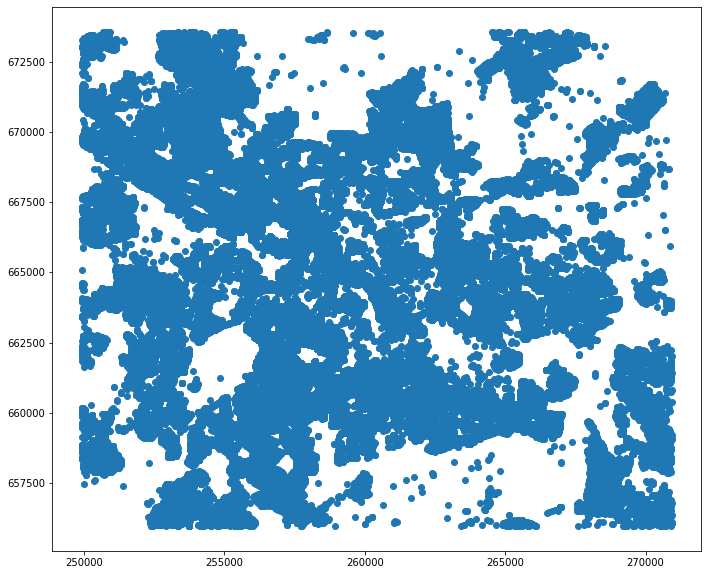

In [371]:
gpp_gdf.plot()

In [372]:
gpp_gdf.head()

,Unnamed: 0,application_date,flag,title_number,date_of_entry,easting,northing,consideration_1,year,geometry
0,4,2008-03-01,NaN,GLA42635,NaN,252919.72,663924.66,93500.0,2008,POINT (252919.720 663924.660)
1,6,2008-03-01,NaN,GLA198103,NaN,259692.80,659621.60,84000.0,2008,POINT (259692.800 659621.600)
2,8,2008-03-01,NaN,GLA31308,NaN,252564.50,659359.10,81000.0,2008,POINT (252564.500 659359.100)
3,10,2008-03-01,NaN,GLA86041,NaN,264653.90,668245.50,85950.0,2008,POINT (264653.900 668245.500)
4,12,2008-03-01,NaN,GLA198123,NaN,260881.79,667063.70,124950.0,2008,POINT (260881.790 667063.700)


In [373]:
#load datazone file
dz=gpd.read_file(r'D:\Data\SpatialDataGov\SG_DataZoneBdry_2011\SG_DataZone_Bdry_2011.shp')

In [374]:
#spatial join 

join = gpd.sjoin(gpp_gdf, dz, how="left", op="within")

In [375]:
join= join.iloc[:, 1:12]

In [376]:
join.head()

,application_date,flag,title_number,date_of_entry,easting,northing,consideration_1,year,geometry,index_right,DataZone
0,2008-03-01,NaN,GLA42635,NaN,252919.72,663924.66,93500.0,2008,POINT (252919.720 663924.660),3313.0,S01009819
1,2008-03-01,NaN,GLA198103,NaN,259692.80,659621.60,84000.0,2008,POINT (259692.800 659621.600),3483.0,S01009989
2,2008-03-01,NaN,GLA31308,NaN,252564.50,659359.10,81000.0,2008,POINT (252564.500 659359.100),3260.0,S01009766
3,2008-03-01,NaN,GLA86041,NaN,264653.90,668245.50,85950.0,2008,POINT (264653.900 668245.500),3681.0,S01010187
4,2008-03-01,NaN,GLA198123,NaN,260881.79,667063.70,124950.0,2008,POINT (260881.790 667063.700),3719.0,S01010225


In [377]:
#use merge  so all price points from datazone are included

join_dz = pd.merge(gdf, join,on='DataZone' )

In [378]:
join_dz.head()

,osm_id,code,fclass,name,DataZone,Name_2,TotPop2011,ResPop2011,HHCnt2011,StdAreaHa,...,application_date,flag,title_number,date_of_entry,easting,northing,consideration_1,year,geometry_y,index_right
0,22256341,5601.0,railway_station,Cardonald,S01009810,Cardonald North - 01,855,855,453,9.267757,...,2008-06-02,NaN,GLA213,NaN,253297.41,664685.79,70000.0,2008,POINT (253297.410 664685.790),3304.0
1,22256341,5601.0,railway_station,Cardonald,S01009810,Cardonald North - 01,855,855,453,9.267757,...,2008-04-28,NaN,GLA215,NaN,253343.35,664650.03,75000.0,2008,POINT (253343.350 664650.030),3304.0
2,22256341,5601.0,railway_station,Cardonald,S01009810,Cardonald North - 01,855,855,453,9.267757,...,2008-01-05,NaN,GLA61163,NaN,253373.40,664518.30,138050.0,2008,POINT (253373.400 664518.300),3304.0
3,22256341,5601.0,railway_station,Cardonald,S01009810,Cardonald North - 01,855,855,453,9.267757,...,2008-06-17,NaN,GLA30414,NaN,253361.50,664291.60,88117.0,2008,POINT (253361.500 664291.600),3304.0
4,22256341,5601.0,railway_station,Cardonald,S01009810,Cardonald North - 01,855,855,453,9.267757,...,2008-06-24,NaN,GLA200558,NaN,253476.40,664398.60,110000.0,2008,POINT (253476.400 664398.600),3304.0


In [379]:
join_dz.rename(columns = {'geometry':'geometry_1', 'geometry_y':'geometry'},inplace = True)

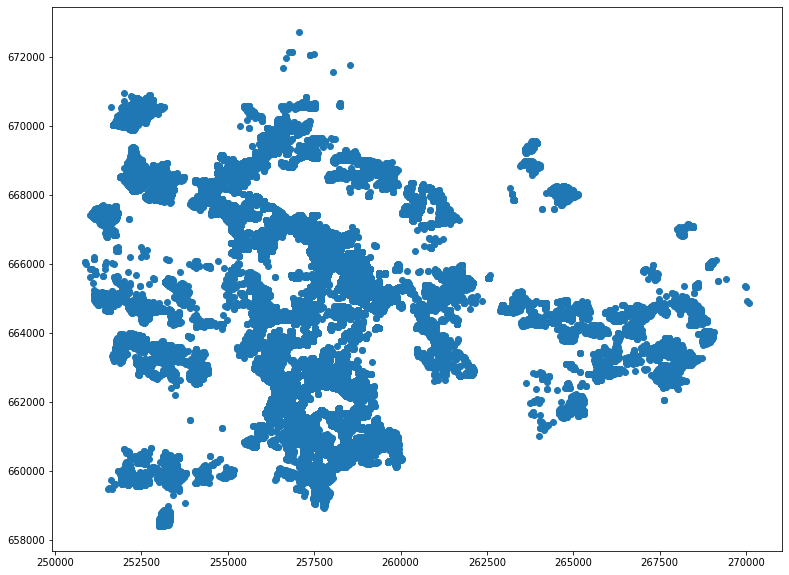

In [380]:
join_dz.plot()

In [381]:
len(join_dz)

83357

In [382]:
#QA - all good
join_dz.query('(DataZone == "S01010188" or DataZone == "S01010187") and year ==2017')['consideration_1'].mean()

219617.9898989899

In [383]:
#QA
#fig, ax = plt.subplots()

#join_dz.query('(DataZone == "S01010188" or DataZone == "S01010187") and year ==2017').plot(ax=ax)
#dz.query('(DataZone == "S01010188" or DataZone == "S01010187")').plot(ax=ax, alpha = 0.2)
##['consideration_1'].mean()

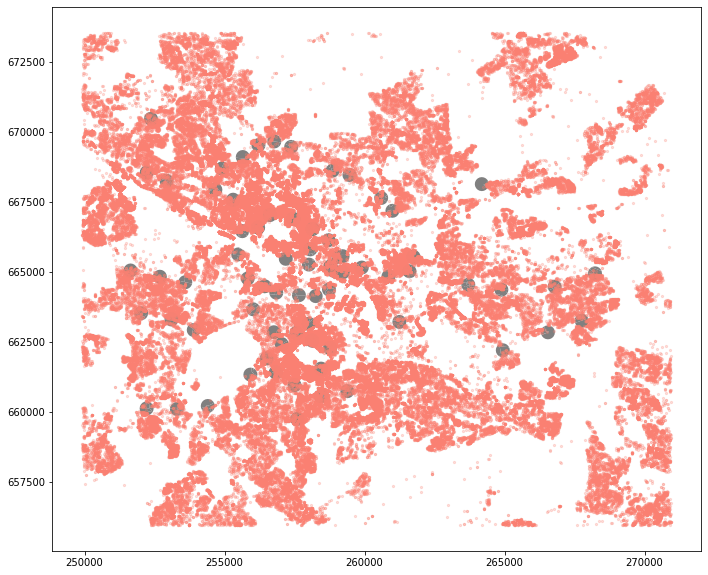

In [384]:
# Create a figure with one subplot
fig, ax = plt.subplots()

# Plot polygons
gdf.plot(ax=ax, facecolor='gray')

# Plot points
gpp_gdf.plot(ax=ax, color='salmon', markersize=5, alpha =0.25)


In [385]:
#subselecting non-empty DataZones

dz_price = join_dz[join_dz['DataZone'].notnull()]

In [386]:
#qa =dz_price.query('name == "Dalmarnock" |year==2018')
#print(qa['year'].mean())

In [387]:
#grouping by name with descriptive stats
export = dz_price.groupby('name')['consideration_1'].describe()

In [388]:
export

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Alexandra Parade,1272.0,92860.890487,60473.925604,20400.0,64937.50,86500.0,110000.0,860451.0
Anderston,1870.0,192171.267481,161896.063753,20400.0,110000.00,149995.0,201250.0,1000000.0
Anniesland,1145.0,203313.467537,127778.062980,20010.0,113500.00,170000.0,271500.0,905000.0
Argyle Street,2596.0,192382.530189,164125.628962,20500.0,99000.00,150000.0,215287.5,1000000.0
Ashfield,520.0,118276.002981,86976.739314,20400.0,55375.00,93625.0,175000.0,945000.0
...,...,...,...,...,...,...,...,...
Springburn,587.0,87599.155111,137025.402376,20160.0,48000.00,65000.0,80000.0,912000.0
St Enoch,2635.0,195520.702467,165079.954312,21000.0,107900.00,150000.0,210000.0,1000000.0
St Georges Cross,1254.0,153351.152081,86757.653154,20700.0,105324.25,142000.0,181000.0,843982.0


In [389]:
export.to_csv(r'd:\viz\trainlines\derived\station_price.csv')

In [390]:
#another way is to keep YEAR data for time series viz
export_year = dz_price.groupby(['name', 'year'])['consideration_1'].describe()


In [391]:
export_year1 = export_year.reset_index()
export_year1.head()

,name,year,count,mean,std,min,25%,50%,75%,max
0,Alexandra Parade,2008,165.0,104771.740242,88466.441126,25500.0,70000.0,95000.0,115000.0,860451.0
1,Alexandra Parade,2009,109.0,94856.528440,63274.117807,21750.0,70000.0,93000.0,109000.0,665000.0
2,Alexandra Parade,2010,111.0,89563.702703,47428.189874,21900.0,67500.0,87500.0,109000.0,329000.0
3,Alexandra Parade,2011,100.0,90171.059600,41852.597025,21600.0,63000.0,87750.0,110000.0,275000.0
4,Alexandra Parade,2012,90.0,82260.088889,48036.222062,25000.0,54625.0,72000.0,95000.0,306000.0


In [392]:
export_year1.query('name == "Dalmarnock"')

,name,year,count,mean,std,min,25%,50%,75%,max
231,Dalmarnock,2008,65.0,109956.723077,117133.326684,20550.0,57000.0,75000.0,106000.00,600000.0
232,Dalmarnock,2009,56.0,118577.410714,104452.140067,21000.0,57000.0,92500.0,125750.00,525000.0
233,Dalmarnock,2010,38.0,181857.631579,204416.564773,22000.0,49250.0,105000.0,175000.00,763760.0
234,Dalmarnock,2011,50.0,181569.000000,157463.223076,31000.0,61375.0,150000.0,331250.00,846000.0
235,Dalmarnock,2012,37.0,374088.594595,352071.673484,25000.0,55000.0,150000.0,814000.00,814000.0
236,Dalmarnock,2013,39.0,95853.774359,111060.752925,22000.0,40000.0,56000.0,98500.00,505100.0
237,Dalmarnock,2014,33.0,117407.575758,163157.551408,23000.0,38000.0,54000.0,85000.00,800000.0
238,Dalmarnock,2015,261.0,131883.807893,55832.456722,29000.0,108000.0,130000.0,165000.00,791256.0
239,Dalmarnock,2016,78.0,112570.153846,75332.929874,23000.0,57750.0,91525.0,153000.00,412800.0
240,Dalmarnock,2017,49.0,128436.081633,183674.433968,30000.0,55000.0,75000.0,105000.00,910000.0


In [393]:
#adding coord to export_year

export_year_xy = pd.merge(export_year1,gdf, on ='name' )
export_year_xy.head()

,name,year,count,mean,std,min,25%,50%,75%,max,...,Name_2,TotPop2011,ResPop2011,HHCnt2011,StdAreaHa,StdAreaKm2,Shape_Leng,Shape_Area,city_name,geometry
0,Alexandra Parade,2008,165.0,104771.740242,88466.441126,25500.0,70000.0,95000.0,115000.0,860451.0,...,Dennistoun North - 01,940,940,562,21.409569,0.214096,3283.408386,214095.679477,Glasgow,"MULTIPOLYGON (((261502.025 665569.771, 261506...."
1,Alexandra Parade,2008,165.0,104771.740242,88466.441126,25500.0,70000.0,95000.0,115000.0,860451.0,...,Dennistoun North - 05,826,826,455,9.528741,0.095287,2356.227869,95287.406022,Glasgow,"MULTIPOLYGON (((261706.311 665314.888, 261672...."
2,Alexandra Parade,2008,165.0,104771.740242,88466.441126,25500.0,70000.0,95000.0,115000.0,860451.0,...,Alexandra Parade - 01,790,790,424,7.311121,0.073112,1314.903379,73111.211172,Glasgow,"MULTIPOLYGON (((261508.598 665611.270, 261512...."
3,Alexandra Parade,2008,165.0,104771.740242,88466.441126,25500.0,70000.0,95000.0,115000.0,860451.0,...,Alexandra Parade - 02,691,691,398,4.092162,0.040921,977.399344,40921.623800,Glasgow,"MULTIPOLYGON (((261786.235 665684.179, 261767...."
4,Alexandra Parade,2008,165.0,104771.740242,88466.441126,25500.0,70000.0,95000.0,115000.0,860451.0,...,Alexandra Parade - 03,1019,980,623,60.949430,0.609495,3931.115872,609494.320584,Glasgow,"MULTIPOLYGON (((262000.152 665557.944, 261987...."


In [394]:
export_year_xy_gdf = gpd.GeoDataFrame(export_year_xy,geometry = 'geometry' )


In [395]:
export_year_xy_gdf.to_file(r'd:\viz\trainlines\derived\New folder\station_price.gpkg', layer='price_dz', driver="GPKG")

CPLE_AppDefinedError: b'sqlite3_exec(CREATE VIRTUAL TABLE "rtree_price_dz_geom" USING rtree(id, minx, maxx, miny, maxy)) failed: no such module: rtree'

Exception ignored in: 'fiona._shim.gdal_flush_cache'
Traceback (most recent call last):
  File "fiona/_err.pyx", line 201, in fiona._err.GDALErrCtxManager.__exit__
fiona._err.CPLE_AppDefinedError: b'sqlite3_exec(CREATE VIRTUAL TABLE "rtree_price_dz_geom" USING rtree(id, minx, maxx, miny, maxy)) failed: no such module: rtree'


In [396]:
export_year_xy_gdf= export_year_xy_gdf[['name','year','mean','fclass','geometry']]

In [397]:
export_year_xy_gdf

,name,year,mean,fclass,geometry
0,Alexandra Parade,2008,104771.740242,railway_station,"MULTIPOLYGON (((261502.025 665569.771, 261506...."
1,Alexandra Parade,2008,104771.740242,railway_station,"MULTIPOLYGON (((261706.311 665314.888, 261672...."
2,Alexandra Parade,2008,104771.740242,railway_station,"MULTIPOLYGON (((261508.598 665611.270, 261512...."
3,Alexandra Parade,2008,104771.740242,railway_station,"MULTIPOLYGON (((261786.235 665684.179, 261767...."
4,Alexandra Parade,2008,104771.740242,railway_station,"MULTIPOLYGON (((262000.152 665557.944, 261987...."
...,...,...,...,...,...
4263,West Street,2014,240417.181818,railway_station,"MULTIPOLYGON (((258504.965 664156.182, 258492...."
4264,West Street,2015,215569.692308,railway_station,"MULTIPOLYGON (((258504.965 664156.182, 258492...."
4265,West Street,2016,134262.206897,railway_station,"MULTIPOLYGON (((258504.965 664156.182, 258492...."
4266,West Street,2017,211408.433333,railway_station,"MULTIPOLYGON (((258504.965 664156.182, 258492...."


In [398]:
export_year_xy_gdf_dissolved = export_year_xy_gdf.dissolve(by=['name','year'])

In [399]:
len(export_year_xy_gdf_dissolved)

792

In [400]:
export_year_xy_gdf_dissolved.query('name == "Ashfield"')

geometry  \
name     year                                                      
Ashfield 2008  POLYGON ((259704.442 668449.000, 259697.428 66...   
         2009  POLYGON ((259704.442 668449.000, 259697.428 66...   
         2010  POLYGON ((259704.442 668449.000, 259697.428 66...   
         2011  POLYGON ((259704.442 668449.000, 259697.428 66...   
         2012  POLYGON ((259704.442 668449.000, 259697.428 66...   
         2013  POLYGON ((259704.442 668449.000, 259697.428 66...   
         2014  POLYGON ((259704.442 668449.000, 259697.428 66...   
         2015  POLYGON ((259704.442 668449.000, 259697.428 66...   
         2016  POLYGON ((259704.442 668449.000, 259697.428 66...   
         2017  POLYGON ((259704.442 668449.000, 259697.428 66...   
         2018  POLYGON ((259704.442 668449.000, 259697.428 66...   

                        mean           fclass  
name     year                                  
Ashfield 2008  161390.668394  railway_station  
         2009   93902.857143  railway_station  
         2010   72221.066667  railway_station  
         2011  112016.109091  railway_station  
         2012   75852.088636  railway_station  
         2013   80203.366667  railway_station  
         2014   97485.057143  railway_station  
         2015   90726.000000  railway_station  
         2016   90719.456522  railway_station  
         2017  108346.170213  railway_station  
         2018   92625.000000  railway_station

In [401]:
df_export = export_year_xy_gdf_dissolved.reset_index()
print (df_export.head())
print (len(df_export))


               name  year                                           geometry  \
0  Alexandra Parade  2008  POLYGON ((261781.066 665312.841, 261750.152 66...   
1  Alexandra Parade  2009  POLYGON ((261781.066 665312.841, 261750.152 66...   
2  Alexandra Parade  2010  POLYGON ((261781.066 665312.841, 261750.152 66...   
3  Alexandra Parade  2011  POLYGON ((261781.066 665312.841, 261750.152 66...   
4  Alexandra Parade  2012  POLYGON ((261781.066 665312.841, 261750.152 66...   

            mean           fclass  
0  104771.740242  railway_station  
1   94856.528440  railway_station  
2   89563.702703  railway_station  
3   90171.059600  railway_station  
4   82260.088889  railway_station  
792


In [402]:
# createing additional column to add datetime for display in QGIS time manager
# DD-MM-YYYY

df_export['time_man'] = '01-01-'+df_export['year'].astype(str)

In [403]:
df_export['mean']=df_export['mean'].round(2).astype(str)

In [404]:
df_export.to_file(r'd:\viz\trainlines\derived\New folder\station_price.gpkg', layer='price_dz_dissolved', driver="GPKG")

CPLE_AppDefinedError: b'sqlite3_exec(CREATE VIRTUAL TABLE "rtree_price_dz_dissolved_geom" USING rtree(id, minx, maxx, miny, maxy)) failed: no such module: rtree'

Exception ignored in: 'fiona._shim.gdal_flush_cache'
Traceback (most recent call last):
  File "fiona/_err.pyx", line 201, in fiona._err.GDALErrCtxManager.__exit__
fiona._err.CPLE_AppDefinedError: b'sqlite3_exec(CREATE VIRTUAL TABLE "rtree_price_dz_dissolved_geom" USING rtree(id, minx, maxx, miny, maxy)) failed: no such module: rtree'


Now there is a need to join data from stations with  *schematics stations*

In [405]:
#Schematics stations
stations = gpd.read_file(r'D:\viz\trainlines\viz_layers.gpkg', layer='stations')

In [406]:
merged  = pd.merge(stations, df_export, on ='name')

In [407]:
merged.tail()

,osm_id,code,fclass_x,name,geometry_x,year,geometry_y,mean,fclass_y,time_man
633,None,NaN,None,Robroyston,POINT (262862.995 669270.013),2014,"POLYGON ((264399.302 668028.779, 264396.071 66...",105443.54,railway_station,01-01-2014
634,None,NaN,None,Robroyston,POINT (262862.995 669270.013),2015,"POLYGON ((264399.302 668028.779, 264396.071 66...",125471.51,railway_station,01-01-2015
635,None,NaN,None,Robroyston,POINT (262862.995 669270.013),2016,"POLYGON ((264399.302 668028.779, 264396.071 66...",112064.71,railway_station,01-01-2016
636,None,NaN,None,Robroyston,POINT (262862.995 669270.013),2017,"POLYGON ((264399.302 668028.779, 264396.071 66...",213359.04,railway_station,01-01-2017
637,None,NaN,None,Robroyston,POINT (262862.995 669270.013),2018,"POLYGON ((264399.302 668028.779, 264396.071 66...",225289.93,railway_station,01-01-2018


In [408]:
merged.rename(columns={'geometry_x':'geometry', 'fclass_y':'fclass'}, inplace =True)

In [409]:
merged.drop( ['osm_id', 'code', 'fclass_x', 'geometry_y'], axis = 1, inplace=True)

In [411]:
#merged.dtypes()

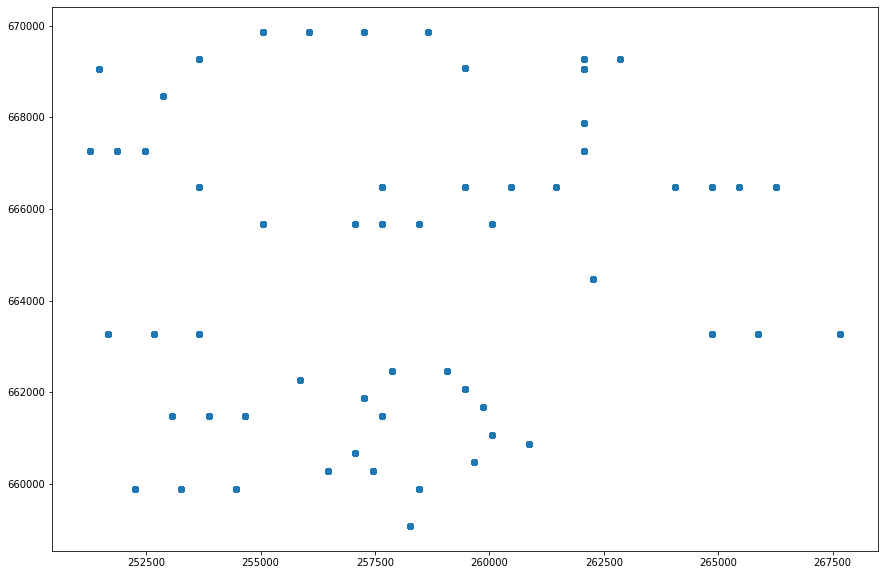

In [412]:
merged.plot()

In [413]:
merged.to_file(r'd:\viz\trainlines\derived\New folder\station_price.gpkg', layer='price_dz_points', driver="GPKG")

CPLE_AppDefinedError: b'sqlite3_exec(CREATE VIRTUAL TABLE "rtree_price_dz_points_geom" USING rtree(id, minx, maxx, miny, maxy)) failed: no such module: rtree'

Exception ignored in: 'fiona._shim.gdal_flush_cache'
Traceback (most recent call last):
  File "fiona/_err.pyx", line 201, in fiona._err.GDALErrCtxManager.__exit__
fiona._err.CPLE_AppDefinedError: b'sqlite3_exec(CREATE VIRTUAL TABLE "rtree_price_dz_points_geom" USING rtree(id, minx, maxx, miny, maxy)) failed: no such module: rtree'
